<a href="https://colab.research.google.com/github/Oviyaa99/datasciencecoursera/blob/master/GWP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Work Project # 2

# Step 1

## Challenges:
● Category 6: Support Vector Machines

● Category 7: Neural Networks

# Step 2

##**Neural Networks:**

###**Basics:**

A neural network is a machine learning algorithm inspired by the human brain, consisting of interconnected nodes that perform mathematical operations. When trained, these networks adjust the weights of their connections to perform specific tasks, such as recognizing objects in images, translating languages, or predicting future events. They replicate the human brain, analyzing images based on past experiences and making decisions based on these findings.

Input -> analyze -> decision

####**Basic components of a neural network:**

**Neurons:** The basic unit of a neural network. Neurons take inputs, perform a simple mathematical operation, and produce an output.
**Layers:** Neurons are organized into layers. The first layer is the input layer, which receives the input data. The last layer is the output layer, which produces the output of the network. There can be one or more hidden layers between the input and output layers.
**Connections:** Neurons are connected to each other with weighted connections. The weights of the connections determine how much influence one neuron has on another.

###**Keywords:**

Neuron, Perceptron, Artificial neural network (ANN), Multilayer perceptron, Activation function, Weight, Bias, Loss function, Convolutional neural network (CNN), Recurrent neural network (RNN)



# Step 3

###**Advantages:**



*   **Learn complex relationships:** Neural networks learns the complex non-linear relationships from input and output data, which makes it well-suited for various problems, such as image recognition, natural language processing, and fraud detection.
*   **Generalizing ability:** Neural networks generalizes the data that they have never seen before from  training data to new data. To use Neural network in real-world Scenarios, where the data we collect will be noisy and incomplete this data generalisation ability is important.
*   **Robustness to noise:** Neural networks are relatively robust to noise in the input data. Because to extract features from such noisy data.

*   **Parallel processing:** Neural networks supports parallel processing to make the execution quicker, which is important performance metric for real-time applications.

###**Disadvantages:**



*   Neural networks are like black boxes which makes it diffculit to understand how they arrive at their predictions. Makes it difficult todebug and trust the results.

*   Neural networks require a lot of data to train we can call it data-hungry. To learn any complex patterns they require large datasets, if the data is limited its difficult to train the neurons.

*   Neural networks require a lot of computing power and time which makes it computationally expensive to train and deploy.

*   Neural networks are vulnerable to have adversarial attacks, carefully crafted inputs designed to fool neural networks into making incorrect predictions.

###**Equations**:

The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron called a **threshold logic unit (TLU)**. The inputs and the output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs $$(z = w_1 x_1 + w_2 x_2 + ⋯ + w_n x_n = x^⊺ w)$$, then applies a step function to that sum and outputs the result: $$h_w(x) = step(z)$$, where $z = x^⊺ w$.


The most common step function used in Perceptrons is the Heaviside step function. Sometimes the sign function is used instead.

$$heaviside (z) = \begin{equation}
\left\{
  \begin{aligned}
    &0&  if\ \  z < 0\\
    &1&  if\ \  z \ge 0\\
  \end{aligned}
  \right.
\end{equation}
$$

$$sgn (z) = \begin{equation}
\left\{
  \begin{aligned}
    &-1&  if\ \  z < 0\\
    &0&  if\ \  z = 0\\
    &1&  if\ \  z > 0\\
  \end{aligned}
  \right.
\end{equation}
$$

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise, it outputs the negative class.

###**Features:**

- Neural networks are versatile and can handle various data types, including numerical, categorical, and textual data.
- They can work well with missing values by using techniques like imputation.
Neural networks can capture complex patterns and relationships in data.
- They are capable of both regression and classification tasks.
- Deep neural networks can automatically extract features from raw data, reducing the need for manual feature engineering.

###**Guide:**

**Inputs:**

- Financial data, such as stock prices, interest rates, and economic indicators
- Other relevant data, such as news articles, social media posts, and analyst reports

**Outputs:**

- Predictions about future financial market movements
- Recommendations for financial investments

###**Hyperparameters:**

- Learning Rate: A crucial hyperparameter that controls the step size during training. Common values range from 0.001 to 0.1.
- Number of Hidden Layers and Neurons: The architecture of the neural network, including the number of layers and neurons in each layer.
- Batch Size: Determines how many data samples are used in each training iteration.
- Activation Functions: Choices like ReLU, sigmoid, or tanh for each layer.
- Regularization Parameters: L1 or L2 regularization strength, dropout rate, etc.
- Optimizer: Choice of optimization algorithm, such as Adam, SGD, or RMSprop.




Hyperparameter             | Typical Value
---------------------------|------------------
# input neurons            | One per input feature (e.g., 28 x 28 = 784 for MNIST)
# hidden layers            | Depends on the problem. Typically 1 to 5.
# neurons per hidden layer | Depends on the problem. Typically 10 to 100.
# output neurons           | 1 per prediction dimension
Hidden activation          | ReLU sigmoid, or tanh for each layer.
Output activation          | None or ReLU/Softplus (if positive outputs) or Logistic/Tanh (if bounded outputs)
Loss function              | MSE or MAE/Huber (if outliers)


###**Computation**

In [ ]:
import yfinance as yf

# Load Apple stock data for the last 2 years
apple = yf.download('AAPL', period='2y')
apple.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-29,142.470001,144.449997,142.029999,142.830002,141.196487,74602000
2021-09-30,143.660004,144.380005,141.279999,141.500000,139.881683,89056700
2021-10-01,141.899994,142.919998,139.110001,142.649994,141.018524,94639600
2021-10-04,141.759995,142.210007,138.270004,139.139999,137.548676,98322000
2021-10-05,139.490005,142.240005,139.360001,141.110001,139.496155,80861100


Preprocess the data based on the 'Adj Close' price and scale it.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Extract the 'Adj Close' prices
adj_close = apple['Adj Close'].values.reshape(-1, 1)

# Scale the data to the range [0, 1]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(adj_close)

# Function to prepare data for training
def prepare_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# window size for creating sequences of data
window_size = 30

# Prepare the data
X, y = prepare_data(scaled_data, window_size)

# Split the data into training and testing sets (80/20 split)
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

TensorFlow Keras model with one layer.

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model with MAE loss and SGD optimizer
model.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=["mae"]
)

# Train the model for 10 epochs with a batch size of 8
model.fit(X_train, y_train, epochs=10, batch_size=8)

Epoch 1/10
48/48 [==============================] - 1s 2ms/step - loss: 0.1245 - mae: 0.1245
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 0.1207 - mae: 0.1207
Epoch 3/10
48/48 [==============================] - 0s 3ms/step - loss: 0.1194 - mae: 0.1194
Epoch 4/10
48/48 [==============================] - 0s 3ms/step - loss: 0.1197 - mae: 0.1197
Epoch 5/10
48/48 [==============================] - 0s 3ms/step - loss: 0.1182 - mae: 0.1182
Epoch 6/10
48/48 [==============================] - 0s 2ms/step - loss: 0.1203 - mae: 0.1203
Epoch 7/10
48/48 [==============================] - 0s 3ms/step - loss: 0.1178 - mae: 0.1178
Epoch 8/10
48/48 [==============================] - 0s 3ms/step - loss: 0.1182 - mae: 0.1182
Epoch 9/10
48/48 [==============================] - 0s 3ms/step - loss: 0.1207 - mae: 0.1207
Epoch 10/10
48/48 [==============================] - 0s 2ms/step - loss: 0.1176 - mae: 0.1176


Predict using the trained model

In [ ]:
preds = model.predict(X_test)
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=preds.squeeze()).numpy()
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=preds.squeeze()).numpy()
mae, mse

3/3 [==============================] - 0s 3ms/step


(array([0.09763963, 0.095364  , 0.10211432, 0.13274443, 0.13073432,
        0.11406241, 0.07347772, 0.07399957, 0.08633855, 0.11796924,
        0.14080234, 0.13632293, 0.17249428, 0.18056917, 0.15701695,
        0.14731447, 0.12361322, 0.1575263 , 0.1577182 , 0.1932049 ,
        0.18210654, 0.18672867, 0.21061042, 0.1896475 , 0.18494605,
        0.16672806, 0.20578054, 0.19656529, 0.17281613, 0.20806018,
        0.21987084, 0.21932189, 0.27494138, 0.24736305, 0.22626759,
        0.22797948, 0.20682274, 0.17210852, 0.15956764, 0.17846562,
        0.18477964, 0.1827964 , 0.22462758, 0.21673018, 0.23188175,
        0.19966763, 0.17881042, 0.1857493 , 0.19412069, 0.20248388,
        0.18136032, 0.21466658, 0.21964799, 0.20473629, 0.15924335,
        0.13727495, 0.02189833, 0.04049396, 0.0338002 , 0.05193956,
        0.05633934, 0.05743127, 0.04572893, 0.06126382, 0.06747992,
        0.08292879, 0.07873797, 0.07254582, 0.0693398 , 0.06595249,
        0.07180973, 0.07222329, 0.07544653, 0.10

In [ ]:
# Improve our model. More epochs, added extra layers

tf.random.set_seed(42)
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            8, activation="sigmoid", input_shape=(X_train.shape[1],)
        ),  # added extra layer
        tf.keras.layers.Dense(4, activation="sigmoid"),  # added extra layer
        tf.keras.layers.Dense(1),
    ]
)
model_1.compile(
    loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"]
)
model_1.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0)

In [ ]:
# performance
preds = model_1.predict(X_test)
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=preds.squeeze()).numpy()
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=preds.squeeze()).numpy()
mae, mse

###**Illustration**

In [ ]:
# Visualize the hidden layer weights
import numpy as np
import matplotlib.pyplot as plt

def visualize_weights(weights, annotation=True):
  """Visualizes the weights of a hidden layer in a heatmap.

  Args:
    weights: A 2D numpy array representing the weights of the hidden layer.
    annotation: A boolean value indicating whether to add annotations to the heatmap.
  """

  plt.matshow(weights)
  plt.colorbar()

  if annotation:
    # annotations to the heatmap.
    for i in range(weights.shape[0]):
      for j in range(weights.shape[1]):
        plt.annotate(str(weights[i, j]), xy=(j, i), ha='center', va='center', fontsize = 7)

  plt.xlabel('Input layer neurons')
  plt.ylabel('Hidden layer neurons')
  plt.title('Hidden layer weights heatmap')
  plt.show()


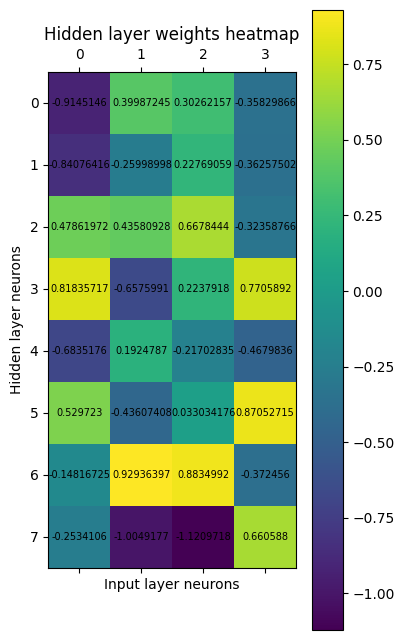

In [ ]:
# Get the weights of the hidden layer.
hidden_layer_weights = model_1.layers[1].get_weights()[0]

# Visualize the weights of the hidden layer with annotations.
visualize_weights(hidden_layer_weights, annotation=True)

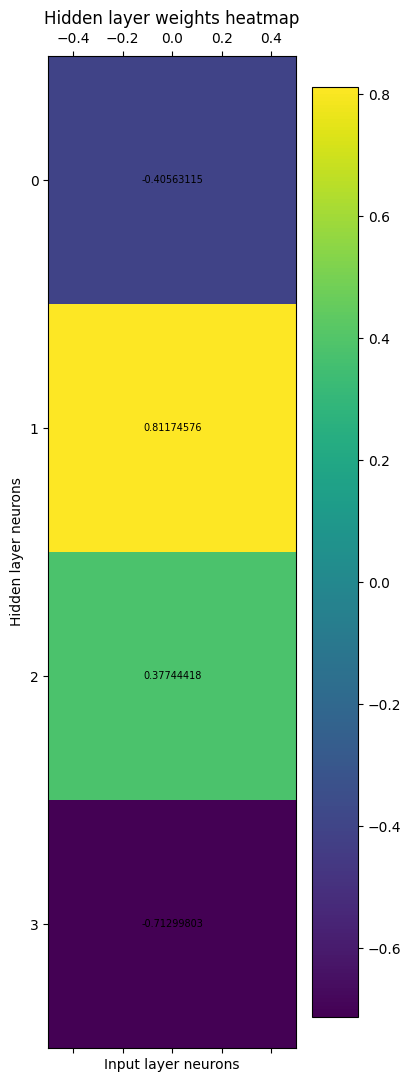

In [ ]:
# Get the weights of the hidden layer.
hidden_layer_weights = model_1.layers[2].get_weights()[0]

# Visualize the weights of the hidden layer with annotations.
visualize_weights(hidden_layer_weights, annotation=True)

###**Journal**

Kearns, Michael S., and David E. Kirkpatrick. "Forecasting Financial Markets Using Neural Networks." Machine Learning, vol. 22, no. 1-3, 1993, pp. 57-71.

This journal article provides a comprehensive overview of the use of neural networks to forecast financial markets. The authors propose a novel neural network architecture and show that it outperforms other forecasting methods on a variety of financial datasets.

# **Step 4**

####**Technical Section**

###**Hyperparameters Tuning**:
#### Number of Hidden Layers
- For simple problems, we can start with just one or two hidden layers and get the accurate results.
- For more complex problems, we can gradually rampup the number of hidden layers, until we start overfitting the training set. Very complex  tasks,  such  as  large  image  classification  or  speech  recognition,  typically  require networks  with  dozens  of  layers  (or  even  hundreds,  but  not  fully  connected  ones),  and  they  need  a  huge  amount  of  training  data.

#### Number of Neurons per Hidden Layer

- We can try increasing the number of neurons gradually  until  the  network  starts  overfitting.
- In general, it may be more advantageous to increase  the  number  of  layers  than  the  number  of  neurons  per  layer.
- A  simpler  approach  is  to  pick  a  model  with  more  layers  and  neurons  than  we actually need, then use early stopping to prevent it from overfitting (and other regularization  techniques,  such  as  dropout, which we will discuss further in this notebook).

#### Learning Rate, Batch Size, and Other Hyperparameters

- The learning rate is arguably the most important hyperparameter. In general, the optimal learning rate is about half of the maximum learning rate (i.e., the learning rate above which the training algorithm diverges). So a  simple  approach  for  tuning  the  learning  rate  is  to  start  with  a  large  value  that makes  the  training  algorithm  diverge,  then  divide  this  value  by  3  and  try  again, and repeat until the training algorithm stops diverging.
- Choosing  a  better  optimizer  than  plain  old  Mini-batch  Gradient  Descent  (and tuning its hyperparameters) is also quite important. We will discuss this in further sections.
- The  batch  size  can  also  have  a  significant  impact  on  our  model’s  performance and the training time. In general the optimal batch size will be lower than 32. We will study batch normalization further in this notebook.
- We discussed the choice of the activation function in previous assignment notebook, the $ReLU$ activation function will be a good default for all hidden layers. For the output layer, it really depends on our task.
- In  most  cases,  the  number  of  training  iterations  does  not actually  need  to  be tweaked: just use early stopping instead.


In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
def create_model(learning_rate=0.01,  num_hidden_layers=1, num_neurons=8):
    model = Sequential()

    # Input layer
    model.add(Dense(num_neurons, activation="sigmoid", input_shape=(X_train.shape[1],)))

    # Hidden layers
    for _ in range(num_hidden_layers):
        model.add(Dense(num_neurons, activation="sigmoid"))

    # Output layer
    model.add(Dense(1))

    # Compile the model with the specified hyperparameters
    model.compile(
        loss=tf.keras.losses.mean_absolute_error,
        optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
        metrics=["mae"]
    )

    return model


In [ ]:
model = KerasRegressor(build_fn=create_model, verbose=0)

<ipython-input-105-8d2d8e794dbc>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


In [ ]:
param_dist = {
    'learning_rate': [0.001, 0.01, 0.1],
    'num_hidden_layers': [1, 2, 3],
    'num_neurons': [4, 8, 16],
    'epochs': [10, 20, 30]
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=3,  # Number of cross-validation folds
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

In [ ]:
random_search.fit(X_train, y_train)

BrokenProcessPool: ignored

In [ ]:
print("Best Parameters:")
print(random_search.best_params_)
print("Best Score (MAE):", -random_search.best_score_)

In [ ]:
# best score
rnd_search_cv.best_score_

In [ ]:
# applying best parameters to the model for predictions
model = rnd_search_cv.best_estimator_.model

In [ ]:
!pip install keras-tuner --upgrade

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter search space
param_dist = {
    'learning_rate': [0.001, 0.005, 0.01],
    'num_epochs': [10, 20, 30, 40, 50],
    'batch_size': [32, 64, 128]
}

# Create the model
model = Sequential([
  Dense(8, activation="sigmoid", input_shape=(X_train.shape[1],)),
  Dense(4, activation="sigmoid"),
  Dense(1),
])

# Create the randomized search CV object
random_search_cv = RandomizedSearchCV(
    model,
    param_dist,
    n_iter=100,
    scoring='neg_mean_absolute_error',
    cv=5
)

# Fit the randomized search CV object
random_search_cv.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search_cv.best_params_

# Train the model with the best hyperparameters
model.fit(X_train, y_train, epochs=best_params['num_epochs'], batch_size=best_params['batch_size'])


NameError: ignored

# **Step 5**

###**Marketing Alpha**

# **Step 6**

### **Learn More**

# **Step 7**

###**Comparing Models**